In [1]:
import numpy as np
from qiskit import *
import math as m
from scipy import linalg as la
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:107: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros(len(label), dtype=np.bool)
/opt/anaconda3/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:108: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(len(label), dtype=np.bool)
/opt

In [24]:
#spin up
u = np.matrix([[1], [0]])
#spin down
d = np.matrix([[0], [1]])
# pure state |0><0|
#H is the conjugate transpose
P11 = np.dot(u, u.H)
# Pure state |0><1|
P12 = np.dot(u, d.H)
# Pure state |1><0|
P21 = np.dot(d, u.H)
# Pure state |1><1|
P22 = np.dot(d, d.H)

# Define the mixed state |0><0| + |1><1| 
I = (P11+P22)/2
# Define the pure state |0><0|+|0><1|+|1><0|+|1><1| 
D = (P11+P12+P21+P22)/2

In [25]:
def von_neumann_entropy(matrix):
    val=0
    eiglist = np.linalg.eig(matrix)
    for i in range(0, len(eiglist[0])):
        val+=eiglist[0][i]*np.log2(eiglist[0][i])
    return -1*val

In [26]:
import matplotlib.pyplot as plt
p = np.arange(0.001, 1., 0.01) #probability list

#create list of von Neumann entropies
vn_y = list()
for value in p:
    #rho_p = value*P11 + (1-value)*P22 (THIS IS ZERO PARAM DENSITY)
    rho_p = value*I + (1-value)*D #(this is one param density)
    vn_y.append(von_neumann_entropy(rho_p))

#convert list of matrices to list of nos for plotting
y=list()
for value in vn_y:
    y.append(value)



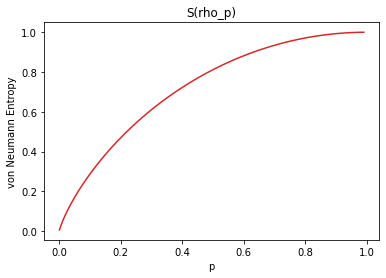

In [27]:
#plot p vs. S(rho_p)
plt.xlabel('p')
plt.ylabel('von Neumann Entropy')
plt.title('S(rho_p)')
plt.plot(p, y, color='tab:red')
plt.show()